In [ ]:
from aiida import load_profile
from aiida.orm import load_node, BandsData

load_profile('lauerm-test')

Profile<uuid='f4d23725fea446908276e21eedde97d3' name='lauerm-test'>

In [121]:
bands_wc = load_node(5393)
bands_wc.outputs.misc.get_dict()

{'total_energies': {'energy_extrapolated': -30.06987208,
  'energy_extrapolated_electronic': -30.06987208},
 'maximum_stress': 17.76303105,
 'maximum_force': 0.26115525,
 'notifications': [],
 'run_status': {'nelm': 60,
  'nsw': 0,
  'last_iteration_index': [1, 11],
  'finished': True,
  'ionic_converged': None,
  'electronic_converged': True,
  'consistent_nelm_breach': False,
  'contains_nelm_breach': False,
  'nbands': 24},
 'run_stats': {'mem_usage_base': 30000.0,
  'mem_usage_nonl-proj': 25155.0,
  'mem_usage_fftplans': 183.0,
  'mem_usage_grid': 641.0,
  'mem_usage_one-center': 12.0,
  'mem_usage_wavefun': 3252.0,
  'total_cpu_time_used': 12.632,
  'user_time': 12.396,
  'system_time': 0.236,
  'elapsed_time': 13.952,
  'maximum_memory_used': 240816.0,
  'average_memory_used': None},
 'version': '6.4.3'}

In [118]:
import numpy as np
import matplotlib.pyplot as plt

bands_data = bands_wc.outputs.bands
stored_bands = bands_data.get_bands()

band_type_idx = np.array([[0] * stored_bands.shape[2] + [1] * stored_bands.shape[2]])

kpoints = np.array(bands_data.get_kpoints())

for idx, kpoint in enumerate(kpoints):
    
    if any([np.round(np.linalg.norm(kpoint - high_sym_pt), 6) == 0 for high_sym_pt in [[0.5, 0, 0], [1/3, 1/3, 0], [0,0,0], [0,0,1/2], [1/3,1/3,1/2], [1/2,0,1/2]]]):
        print(idx, kpoint)

0 [0. 0. 0.]
22 [0.5 0.  0. ]
34 [0.33333333 0.33333333 0.        ]
59 [0. 0. 0.]
70 [0.  0.  0.5]
92 [0.5 0.  0.5]
104 [0.33333333 0.33333333 0.5       ]
129 [0.  0.  0.5]
130 [0.5 0.  0.5]
141 [0.5 0.  0. ]
142 [0.33333333 0.33333333 0.5       ]
153 [0.33333333 0.33333333 0.        ]


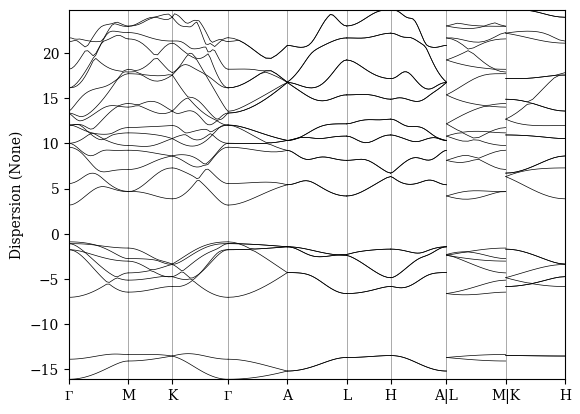

-4.0637

In [ ]:
from aiida.orm import BandsData
import xml.etree.ElementTree as ET

retrieved = bands_wc.outputs.retrieved
vasprun = retrieved.get_object_content('vasprun.xml')
root = ET.fromstring(vasprun)
e_fermi = float(root.find('.//i[@name="efermi"]').text.strip())

# EFERMI is 7.08193572
new_bands_data = BandsData()
new_bands_data.set_kpoints(bands_data.get_kpoints())
new_bands_data.set_bands(bands_data.get_bands())

new_bands_data.labels = [(0, 'GAMMA'), (22, 'M'), (34, 'K'), (59, 'GAMMA'), (70, 'A'), (92, 'L'), (104, 'H'), (129, 'A'), (130, 'L'), (141, 'M'), (142, 'K'), (153, 'H')]
new_bands_data.show_mpl(y_origin = e_fermi)

new_bands_data.get_bands()[0,0,7] - new_bands_data.get_bands()[0,0,8]
